#### This notebook is created with codes and pictures from 

1) Hands-on Machine Learning with Sci-kit Learn and Tensorflow. Chapter 3. by  Auriel Geron

2) Python Data Science HAndbook. Chapter 5 by VanderPlas, Jake




### We will discuss  Performance measures.

Below we have a plot for a digit classifier.
 Digit classifier aims to classify 5s not not-5s. 


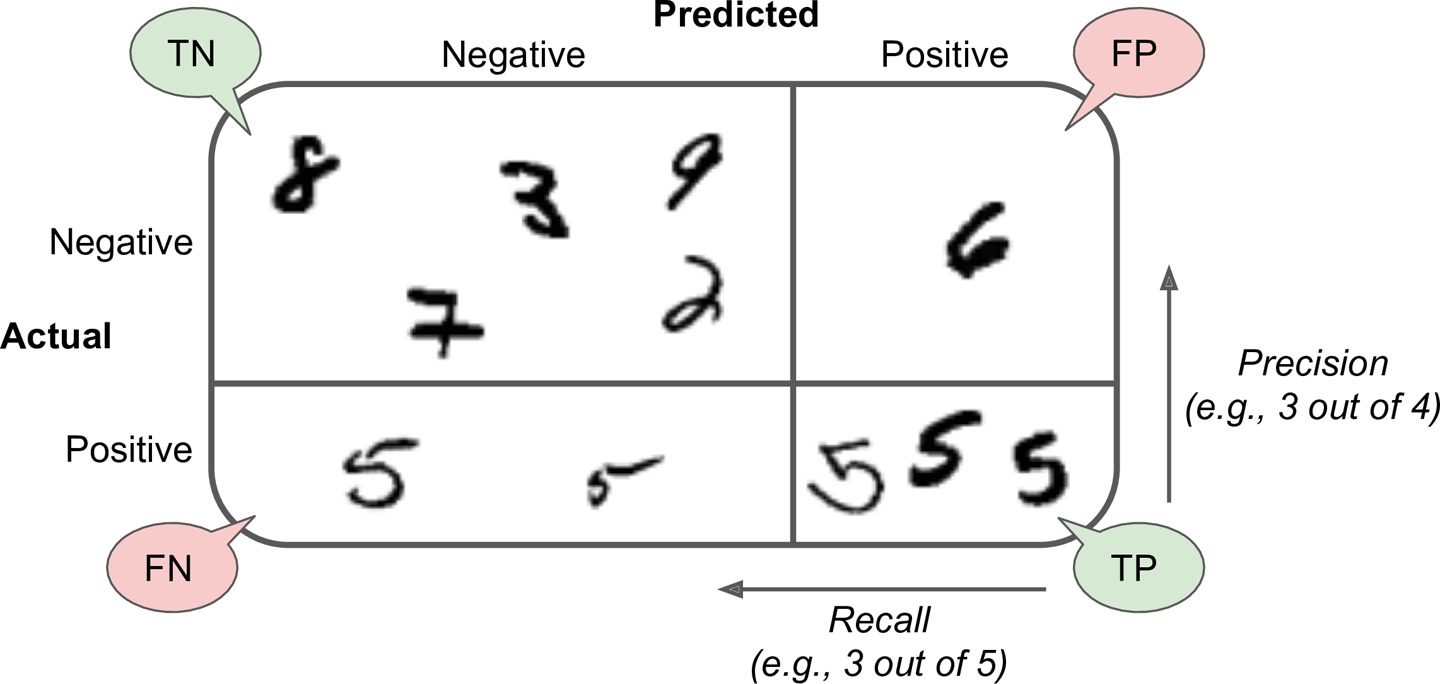

### Recall= is the ratio of correctly classified 5s to all 5s
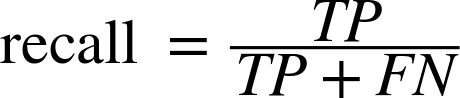

### Precision is the ratio of correctly predicted 5s to all predicted 5s

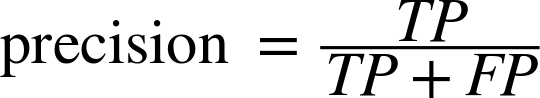



#### For example:

Take a medical test for a disease.
Recall is the probability of a positive result for a person who has the disease
Precision is the ratio of having the disease if you have a positive result

If a test recall 99%, but precision is very low %20. This means if you a have positive result, you still have 1/5 chance of not having the disease


### Precision-Recall Trade/OFF

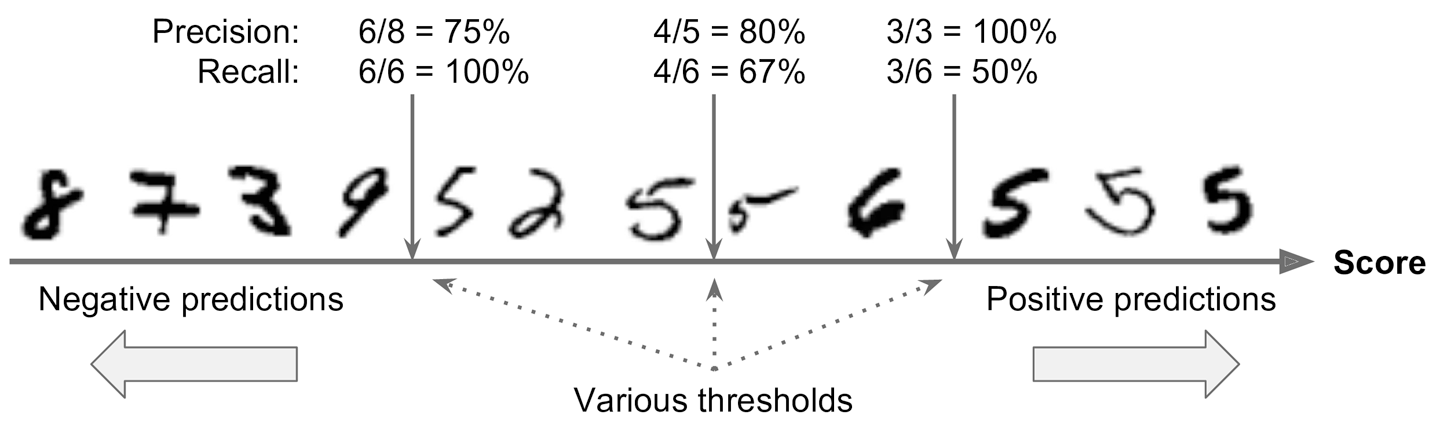



### We can plot this trade-off




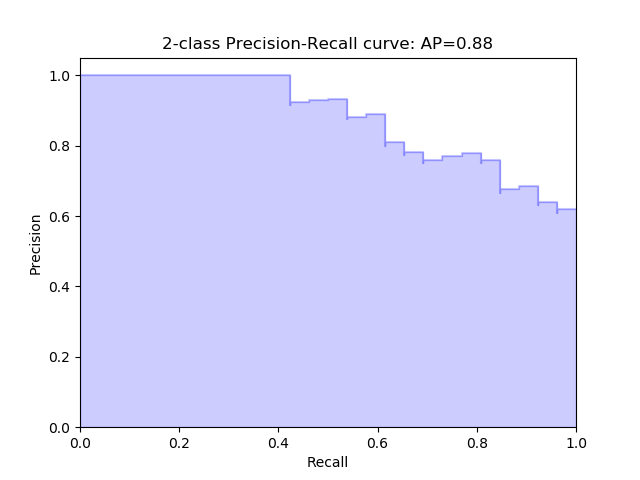







### We can combine precision and recall into a single metric called the F1 score,

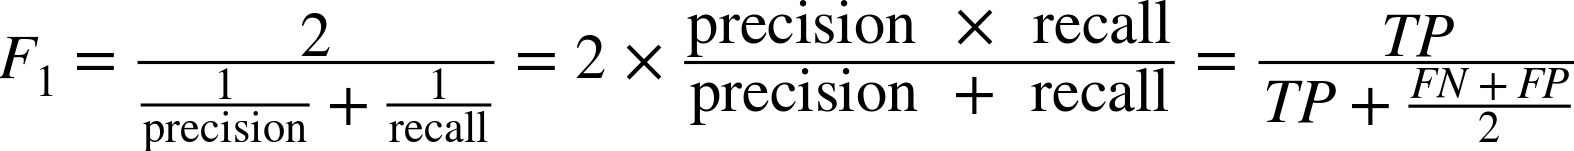

In [1]:
# Example
import numpy as np
from numpy import logical_and as land

y = np.array([0,1,1,1,1,0,0])

ypred = np.array([1,1,1,1,1,1,1])


In [2]:
#assume pos = 1 neg = 0 

tpos = np.count_nonzero(land(ypred == 1, y==1)) # label is pos , prediction is pos
fneg = np.count_nonzero(land(ypred == 0, y==1)) # label is pos, prediction is neg
fpos = np.count_nonzero(land(ypred ==1, y==0))  # label is neg, prediction is pos
recall = tpos/(tpos+fneg)

precision = tpos/(tpos+fpos)


print("recall",recall)
print("precision", precision)
f_1 =2/((1/precision)+(1/recall))
print("f1 score", f_1)

recall 1.0
precision 0.5714285714285714
f1 score 0.7272727272727273


In [3]:
yprob =np.array([0.5,0.55,0.85,0.52,0.57,.56,.58])
ypred = yprob>=0.8
print(ypred)

[False False  True False False False False]


In [4]:
# lets repeat the calculation 
tpos = np.count_nonzero(land(ypred == 1, y==1)) # label is pos , prediction is pos
fneg = np.count_nonzero(land(ypred == 0, y==0)) # label is pos, prediction is neg
fpos = np.count_nonzero(land(ypred ==1, y==0))  # label is neg, prediction is pos
recall = tpos/(tpos+fneg)

precision = tpos/(tpos+fpos)

print("recall",recall)
print("precision", precision)
f_1 =2/((1/precision)+(1/recall))
print("f1 score", f_1)

recall 0.25
precision 1.0
f1 score 0.4


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("prec score:",precision_score(y, ypred))
print("rec score:", recall_score(y, ypred))
print("f1 score:", f1_score(y, ypred))

prec score: 1.0
rec score: 0.25
f1 score: 0.4


In [6]:
from sklearn.metrics import classification_report

print(classification_report(y,ypred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.25      0.40         4

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7



In [ ]:
# PRECISION RECALL CURVE
# you can  plot precision-recall for changing threshold
import matplotlib.pyplot as plt

# lets create random classes
y = np.random.choice([0,1],100)
print(y)
yprob = np.random.rand(y.shape[0])
print(yprob)
thetha = np.linspace(0.02,0.99,100)
pr_list =[]
rc_list =[]
for t in thetha:
    ypred = yprob>=t
    pr_list.append(precision_score(y, ypred))
    rc_list.append(recall_score(y, ypred))

plt.plot(pr_list,rc_list,'o')
plt.xlabel('precision')
plt.ylabel('recall')


In [ ]:
from sklearn.metrics import precision_recall_curve

[pr_ar, rc_ar, th_ar] = precision_recall_curve(y, yprob)

plt.plot(rc_ar,pr_ar,'o')

In [9]:
#our plot looks random because prediction was random. For a true classification this must show the trade-off

#### CONFUSION MATRIX

In [10]:
# tpos, tneg, fneg, fpos forms confusion matrix for two classes
y     = np.array([1, 0, 1, 1, 0, 1])
ypred = np.array([1, 0, 1, 0, 1, 1])
tpos = np.count_nonzero(land(ypred == 1, y==1)) # label is pos , prediction is pos
tneg = np.count_nonzero(land(ypred == 0, y==0)) # label is neg , prediction is neg
fneg = np.count_nonzero(land(ypred == 0, y==1)) # label is pos, prediction is neg
fpos = np.count_nonzero(land(ypred ==1, y==0))  # label is neg, prediction is pos

conf_mat= np.array([[tneg,fneg],[fpos, tpos]])
print(conf_mat)

[[1 1]
 [1 3]]


In [11]:
## CONFUSION MATRIX
# in higher dimensions it is not possible to visualize decision surfaces easily
# for multi-class classifications we can calculate confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y,ypred)

array([[1, 1],
       [1, 3]], dtype=int64)

### REAL EXAMPLE 

### BREAST CANCER DATA

In [35]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X = bc['data']
print("target_names", bc['target_names'])
y = bc['target']
print(X.shape)
print(y)

target_names ['malignant' 'benign']
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("train", X_train.shape)
print("test", X_test.shape)

train (455, 30)
test (114, 30)


In [37]:
from sklearn.linear_model import LogisticRegression
bin_logreg_model = LogisticRegression()
bin_logreg_model.fit(X_train, y_train)

C:\miniconda3\envs\datamin\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_train_pred = bin_logreg_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       169
           1       0.95      0.97      0.96       286

    accuracy                           0.95       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.95      0.94       455



In [40]:
y_train_prob = bin_logreg_model.predict_proba(X_train)

[ps, rs, ts] = precision_recall_curve(y_train, y_train_prob[:,1])

Text(0, 0.5, 'Precision')

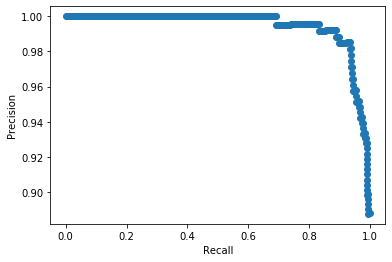

In [41]:
plt.plot(rs,ps,'o')
plt.xlabel('Recall')
plt.ylabel('Precision')

# NEW CLASSIFER Nearest Neighbours (on IRIS)

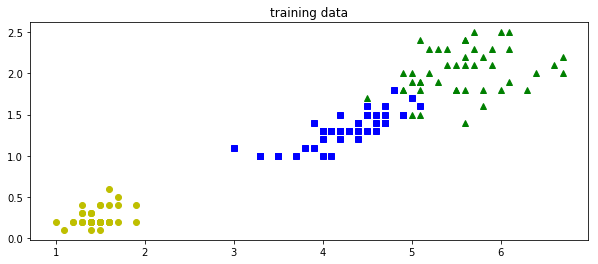

In [43]:
from sklearn import datasets
iris = datasets.load_iris()
print("keys:",iris.keys())


print("target_names", iris['target_names'])


X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
print(y)


keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
target_names ['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [48]:


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'training data')

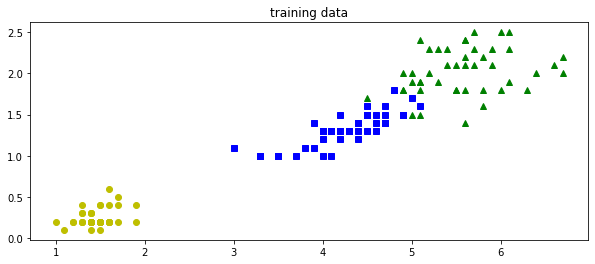

In [49]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label="Iris-Setosa")
plt.title('training data')


In [50]:
ypred = knn.predict(X_train)
print("pred",ypred)
yprob = knn.predict_proba(X_train)
print("prob",yprob)

pred [1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2
 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 2 0 2 0 0
 2 1 2 2 2 2 1 0 0 1 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1
 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 1 0 1 2]
prob [[0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.8 0.2]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.6 0.4]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [1.  0.  

In [51]:
# OR get a complete report
from sklearn.metrics import classification_report
rep = classification_report(y_train,ypred)
print(rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.93      0.93      0.93        44
           2       0.94      0.94      0.94        47

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



In [63]:
confusion_matrix(y_train,ypred)

array([[44,  0,  0],
       [ 0, 41,  3],
       [ 0,  3, 44]], dtype=int64)

<Figure size 432x288 with 0 Axes>

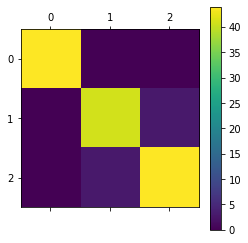

In [64]:
plt.figure()
plt.matshow(confusion_matrix(y_train,ypred))
plt.colorbar()

In [75]:
# indices of mistakes
print(np.nonzero(ypred!=y_train))
print(X_train[np.nonzero(ypred!=y_train)])

# indices of mistakes of only label 1
print(np.nonzero(np.logical_and(ypred!=y_train,y_train==1)))

(array([ 31,  69,  74,  77,  83, 131], dtype=int64),)
[[5.1 1.5]
 [5.  1.7]
 [4.8 1.8]
 [5.1 1.6]
 [5.  1.5]
 [4.5 1.7]]
(array([69, 74, 77], dtype=int64),)


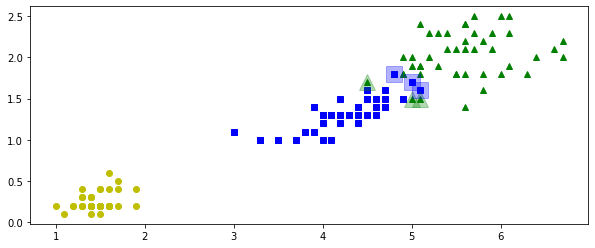

In [77]:
from numpy import logical_and as land
plt.figure(figsize=(10, 4))

plt.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label="Iris-Setosa")
incorrect_ix = ypred!=y_train
i_ix_0 = land(incorrect_ix, y_train==2)
i_ix_1 = land(incorrect_ix,y_train==1)
i_ix_2 = land(incorrect_ix,y_train==0)

# plot the mistakes with transparent larger squares.
plt.plot(X_train[i_ix_0, 0], X_train[i_ix_0, 1], "g^", markersize='16', label="Iris-Virginica", alpha=0.3)
plt.plot(X_train[i_ix_1, 0],X_train[i_ix_1, 1], "bs",  markersize='16',label="Iris-Versicolor", alpha=0.3)
plt.plot(X_train[i_ix_2, 0], X_train[i_ix_2, 1], "yo",  markersize='16',label="Iris-Setosa", alpha=0.3)


(100, 100)
(10000, 2)


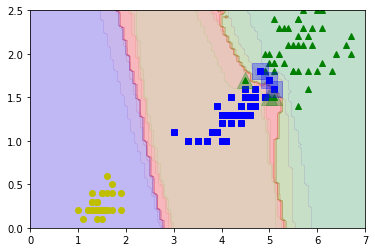

In [89]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    print(x0.shape)
    X = np.c_[x0.ravel(), x1.ravel()]
    print(X.shape)
    y_pred = (clf.predict(X)).reshape(x0.shape)
    y_decision = (clf.predict_proba(X)[:,1]).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(knn, [0, 7., 0, 2.5])

plt.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label="Iris-Setosa")
incorrect_ix = ypred!=y_train
i_ix_0 = land(incorrect_ix, y_train==2)
i_ix_1 = land(incorrect_ix,y_train==1)
i_ix_2 = land(incorrect_ix,y_train==0)

# plot the mistakes with transparent larger squares.
plt.plot(X_train[i_ix_0, 0], X_train[i_ix_0, 1], "g^", markersize='16', label="Iris-Virginica", alpha=0.3)
plt.plot(X_train[i_ix_1, 0],X_train[i_ix_1, 1], "bs",  markersize='16',label="Iris-Versicolor", alpha=0.3)
plt.plot(X_train[i_ix_2, 0], X_train[i_ix_2, 1], "yo",  markersize='16',label="Iris-Setosa", alpha=0.3)
#plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

#### HW  

Repeat the KNN performance measures for X_test

Train performance can be over optimistic. However tuning must be done in train set only We would like to obtain best performance in X_test

What is the best K?

### You can use KNN when you have lots of data and like to see an immediate result without much tuning. 

The difference between train and test performance is important. 

You must calculate cross_val_score to make sure the mean and std of performance for different random cuts of train and test

# NAIVE BAYES AND Example: Classifying text

NAIVE BAYES

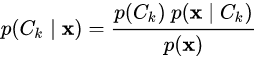

x is a vector of attributes because we have multi features

We assume  that attributes are independent. In reality they may not be

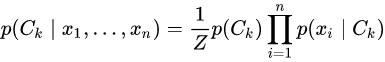


Then we can build a classifier with maximum probability product. 

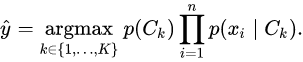

# Gaussian naive Bayes

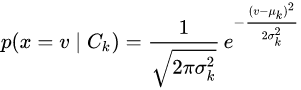

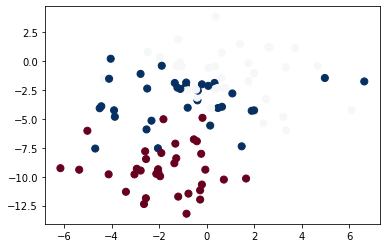

In [125]:
# Example blob dataset in two dimensions
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=3, random_state=2, cluster_std=2.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

If we fit two gaussians to these points we can build naive bayes easity

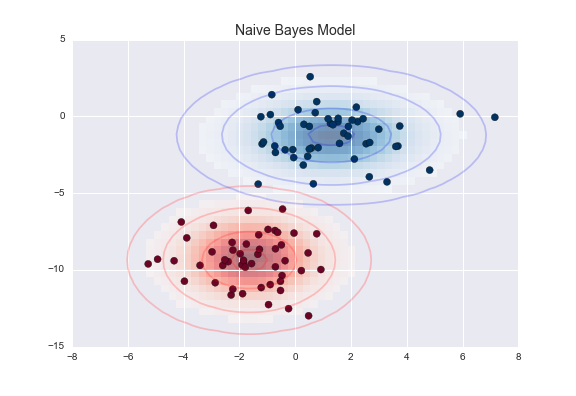

In [126]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()



In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model.fit(X_train, y_train)
yprob = model.predict_proba(X_train)
ypred = model.predict(X_train)

In [128]:
rep = classification_report(y_train,ypred)
print(rep)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.80      0.83      0.81        29
           2       0.71      0.69      0.70        29

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [129]:
#REpeat the test for TEST. 
yprob_test = model.predict_proba(X_test)
ypred_test = model.predict(X_test)
rep = classification_report(y_test,ypred_test) # cross_validation_score
print(rep)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.75      0.75      0.75         4
           2       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.75      0.71        10
weighted avg       0.70      0.70      0.69        10



(100, 100)
(10000, 2)


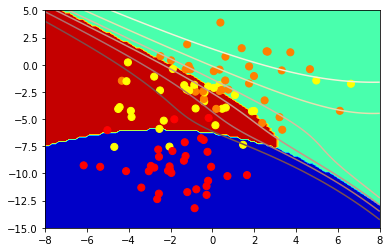

In [133]:
# PLOT DECISION SURFACE and CONTOUR PLOTS

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

x0, x1 = np.meshgrid(
        np.linspace(-8,8,100).reshape(-1, 1),
        np.linspace(-15,5,100).reshape(-1, 1),
    )
print(x0.shape)
X_n = np.zeros((10000,2))
X_n[:,0] = x0.flatten()
X_n[:,1] = x1.flatten()
print(X_n.shape)


y_proba = model.predict_proba(X_n)
y_predict = model.predict(X_n)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.contourf(x0, x1, zz, cmap='jet')
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.pink)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')




### Example: Classifying text

  ### Naive Bayes is often used is in text classification, where

In [134]:
from sklearn.datasets import fetch_20newsgroups

In [136]:
data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [139]:
# The problem is to predict which email-group this email belongs to. 
data.data[0]

'From: twillis@ec.ecn.purdue.edu (Thomas E Willis)\nSubject: PB questions...\nOrganization: Purdue University Engineering Computer Network\nDistribution: usa\nLines: 36\n\nwell folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985.  sooo, i\'m in the market for a\nnew machine a bit sooner than i intended to be...\n\ni\'m looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopefully) somebody can answer:\n\n* does anybody know any dirt on when the next round of powerbook\nintroductions are expected?  i\'d heard the 185c was supposed to make an\nappearence "this summer" but haven\'t heard anymore on it - and since i\ndon\'t have access to macleak, i was wondering if anybody out there had\nmore info...\n\n* has anybody heard rumors about price drops to the powerbook line like the\nones the duo\'s just went through recently?\n\n* what\'s the impression of the display on the 180?  i could probably swin

In [140]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
              'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
TfidfVectorizer?

In [ ]:
# HW follow the BOOK Python Data Science Hand BOOK
# 0) Analyse the train set. How are the samples distributed among samples?
# 1) Complete the example analysis in Chapter 5: NAIVE BAYES Section (TExt Classification Example)
# 2) Print the classification report
# 3) Comment on the results, which category was best classified? 
# 4) Repeat training and test for KNN. Tune the  K value on train, test in on Test. 
# 5) Comment on the results.

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
   'This document is the second document.',
   'And this is the third one.',
   'Is this the first document?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)
print(X[0])

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483


In [149]:
%whos

Variable                 Type                    Data/Info
----------------------------------------------------------
GaussianNB               ABCMeta                 <class 'sklearn.naive_bayes.GaussianNB'>
KNeighborsClassifier     ABCMeta                 <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LogisticRegression       type                    <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MultinomialNB            ABCMeta                 <class 'sklearn.naive_bayes.MultinomialNB'>
TfidfVectorizer          type                    <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
X                        csr_matrix                (0, 1)	0.46979138557992<...>3, 8)	0.38408524091481483
X_n                      ndarray                 10000x2: 20000 elems, type `float64`, 160000 bytes (156.25 kb)
X_test                   ndarray                 10x2: 20 elems, type `float64`, 160 bytes
X_train                  ndarray                 90x2: 180 elems, type `floa